In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataPreprocess import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
from random import uniform

## Organize borehole locations into clusters

In [56]:
bh_file_path = 'components_analysis/df_unique.csv'
df = pd.read_csv(bh_file_path, header=[0])

In [78]:
X = np.array(df[['latitude','longitude']])

In [79]:
X

array([[  69.16162, -133.08682],
       [  69.16162, -133.08682],
       [  69.16162, -133.08682],
       ...,
       [  68.38386, -133.70967],
       [  68.38386, -133.70967],
       [  68.38386, -133.70967]])

In [ ]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.01)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
#labels looks like [0, 0, 0, 1, 1, 1, 1, 2, 2,....]

cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.axis('equal')
plt.show()

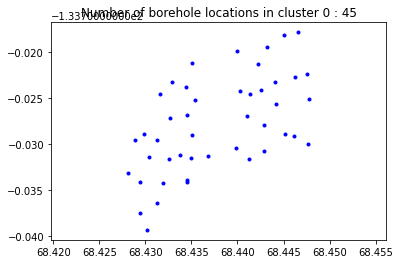

In [58]:
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    if k == 0:
        plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
        break
    
plt.title("Number of borehole locations in cluster 0 : %d" % sum(labels==0))
plt.axis('equal')
plt.show()

In [59]:
df_cluster = df.iloc[labels==0]
bh_id_cluster = df_cluster.borehole


In [60]:
bh_file_path = 'data_stephen_fix_header.csv'
label = 'visible_ice'
list_cols = ['latitude', 'longitude','depth']

df = pd.read_csv(bh_file_path, header=[0])

df, n_classes = prepare_df(df, list_cols, label)                              

Dataframe has length 2837
Number of unique boreholes is 566
Latitude ranges from 68.36933 to 69.44755
Longitude ranges from -133.82843 to -132.89346
List of columns normalized: ['latitude_norm', 'longitude_norm', 'depth_norm']
visible_ice: 'None' entries have been replaced by 'No visible ice'
visible_ice column entries has been ordered:
[NaN, 'Pure ice', 'No visible ice', 'High', 'Medium to high', 'Low']
Categories (5, object): ['No visible ice' < 'Low' < 'Medium to high' < 'High' < 'Pure ice']
with corresponding codes in visible_ice_code column:
[-1  4  0  3  2  1]
visible_ice: binary column generated
materials: 'ICE' and 'ice' entries has been standardized into 'Ice'
'material_ice' column generated
materials has been categorized into codes in materials_code
Null entries of visible_ice dropped


In [61]:
df[['materials_code_norm', 'visible_ice_code_norm']] = scale_column(df[['materials_code', 'visible_ice_code']])
df=df.dropna(subset=['materials'])

In [63]:
df2 = df[df['borehole'].isin(bh_id_cluster)]

In [65]:
df2 = df2[['latitude_norm', 'longitude_norm', 'depth_norm', 'materials_code_norm', 'visible_ice_code_norm']]

In [91]:
X = df2.to_numpy()

In [99]:
X=X[:,2:5]

In [101]:

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
#labels looks like [0, 0, 0, 1, 1, 1, 1, 2, 2,....]

cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 8


In [102]:
cluster_centers

array([[-0.37443663,  0.95964595, -0.97118293],
       [ 0.04628672, -1.30696678, -0.74489437],
       [ 0.14414103, -1.35996797,  0.14263005],
       [-0.2857036 ,  1.04359811,  0.26963456],
       [ 1.05948412,  1.01193506, -0.03673799],
       [ 0.13340669, -0.08793933,  2.22936243],
       [ 3.41406479, -1.37112611, -1.02452535],
       [ 2.37847198, -1.37112611, -1.02452535]])

In [69]:
n_dividers = 2
dividers = [uniform(-1, 1) for _ in range(n_dividers)]


In [10]:
long_max = df.longitude_norm.max()
long_min = df.longitude_norm.min()
long_range = np.linspace(long_min, long_max, 10)

lat_max = df.latitude_norm.max()
lat_min = df.latitude_norm.min()
lat_range = np.linspace(lat_min, lat_max, 10)

In [11]:
xx, yy = np.meshgrid(long_range, lat_range)

In [12]:
z = -b/w[2] - w[0]/w[2] * yy - w[1]/w[2] * xx

In [16]:
-b/w[2]

array([-1.77035232])

In [18]:
-w[0]/w[2]

array([-0.07057003])

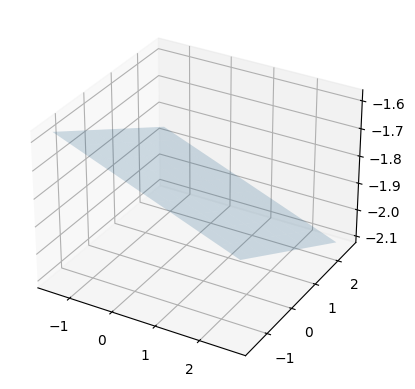

In [19]:
%matplotlib widget
# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.2)

# and plot the point 
# ax.scatter(df.longitude_norm , df.latitude_norm , df.depth_norm)

In [14]:
import pickle
pickle.dump(fig, open('DecisionBoundary.fig.pickle', 'wb'))